<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/main/tf_mnist_NUMBERCLASSIFICATION_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

print(tf.__version__)

In [2]:
#
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build The Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2940 - accuracy: 0.9138 - val_loss: 0.1383 - val_accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1420 - accuracy: 0.9575 - val_loss: 0.1002 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1083 - accuracy: 0.9679 - val_loss: 0.0883 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.0813 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0765 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0650 - accuracy: 0.9793 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.0720 - val_accurac

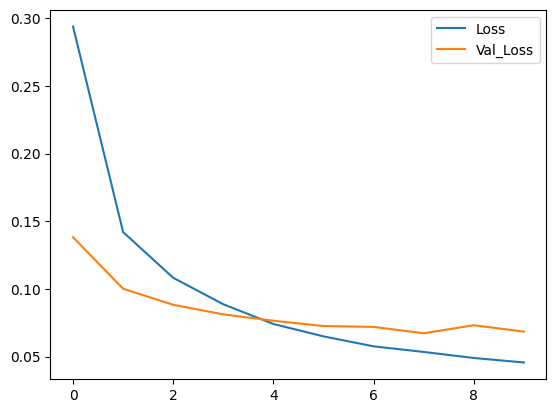

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

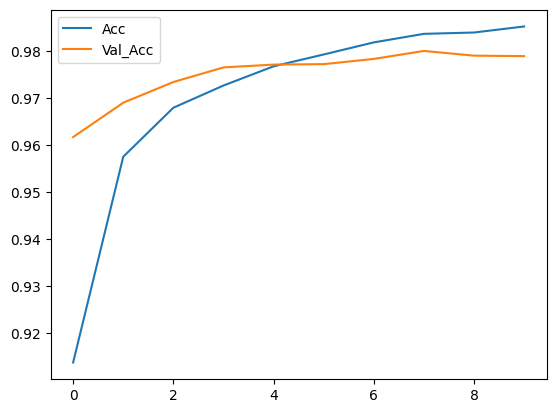

In [7]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='Acc')
plt.plot(r.history['val_accuracy'], label='Val_Acc')
plt.legend()

In [8]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9789
[0.06850231438875198, 0.9789000153541565]


313/313 [==============================] - 1s 2ms/step
Confusion Matrix, without normalization
[[ 970    1    3    0    1    0    2    1    2    0]
 [   0 1124    3    1    0    0    2    0    5    0]
 [   2    1 1018    2    1    0    1    3    4    0]
 [   0    0   10  975    0    8    1    4    5    7]
 [   0    0    4    0  955    0    4    3    2   14]
 [   2    0    0    5    1  877    2    0    5    0]
 [   3    3    2    1    4    5  936    0    4    0]
 [   1    2   12    3    0    0    0 1002    1    7]
 [   2    0    5    8    3    3    1    4  946    2]
 [   0    2    0    3    7    3    1    4    3  986]]


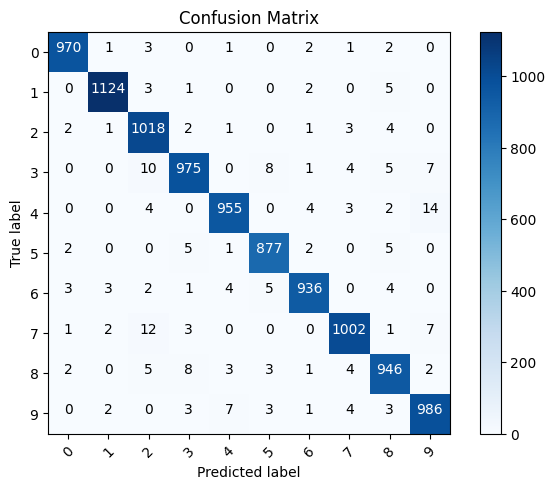

In [9]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
# Plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=true'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  plt.imshow(cm , interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color='white' if cm[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

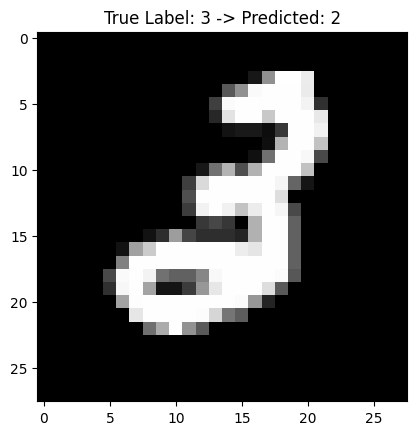

In [14]:
# Show some misclassified expamples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s -> Predicted: %s" % (y_test[i], p_test[i]));

In [15]:
# SAVING this into in a FILE Path
model.save('number_classification.h5')

In [16]:
# Checking if the file exists
!ls -1h

number_classification.h5
sample_data


In [19]:
model = tf.keras.models.load_model('number_classification.h5')
print(model.layers)
model.evaluate(x_test, y_test)

[<keras.layers.reshaping.flatten.Flatten object at 0x7f68a84bbc70>, <keras.layers.core.dense.Dense object at 0x7f68a84bb9d0>, <keras.layers.regularization.dropout.Dropout object at 0x7f68a84bb550>, <keras.layers.core.dense.Dense object at 0x7f68a83e8a00>]
313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9789


[0.06850231438875198, 0.9789000153541565]